In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine
def load_and_process(url_or_path_to_csv_file):
    df=pd.read_csv(url_or_path_to_csv_file, encoding= 'unicode_escape')

    df.dropna()
    df = (
        df
        .assign(Weekend=lambda x: x["Weekend?"]=="Weekend")
        .assign(DateTime=lambda x:pd.to_datetime(x["Year"] + x["Month"] + x["Hour"]))
        .rename(columns={"Injury Type":"Type"})
        .dropna()
        .drop(['Weekend?',"Year","Month","Hour"],axis=1)
        .sort_values("Master Record Number", ascending=True)
        .reset_index()
    )
#     df.to_csv("./processed/monroe-county-crash-data2003-to-2015.csv")
    
    return df



<Figure size 1440x360 with 0 Axes>

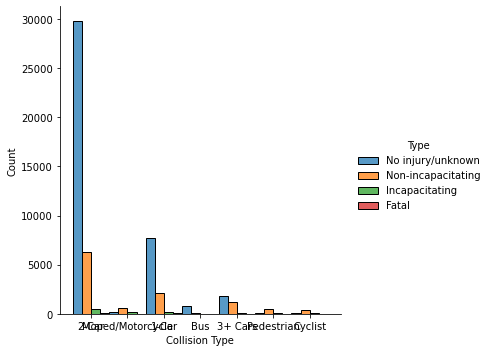

In [21]:
import matplotlib.pyplot as plt
df = load_and_process("../data/raw/monroe-county-crash-data2003-to-2015.csv")
plt.figure(figsize=(20,5))
ax = sns.displot(df, x="Collision Type", hue="Type",multiple="dodge")

In [22]:
df.describe()

,index,Master Record Number,Day,Latitude,Longitude
count,52582.000000,5.258200e+04,52582.000000,52582.000000,52582.000000
mean,26832.483835,6.804322e+08,4.198490,35.609842,-78.680587
std,15470.090993,3.874820e+08,1.906186,11.250443,24.870831
min,0.000000,1.470500e+04,1.000000,0.000000,-88.959213
25%,13475.250000,9.000596e+08,3.000000,39.142048,-86.552192
50%,26839.500000,9.011297e+08,4.000000,39.164430,-86.531008
75%,40127.750000,9.019044e+08,6.000000,39.173344,-86.508288
max,53942.000000,9.026271e+08,7.000000,41.228665,86.596363


In [23]:
df.columns

Index(['index', 'Master Record Number', 'Day', 'Collision Type', 'Type',
       'Primary Factor', 'Reported_Location', 'Latitude', 'Longitude',
       'Weekend', 'DateTime'],
      dtype='object')

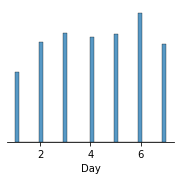

In [26]:
ax = sns.pairplot(df[["Day","Collision Type","Type","Primary Factor"]],corner=True)

<AxesSubplot:xlabel='Day', ylabel='Collision Type'>

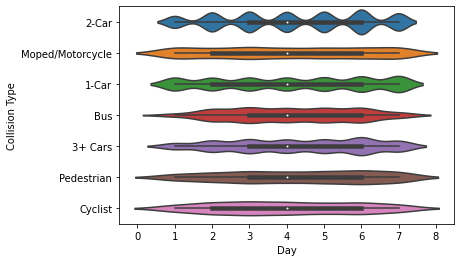

In [27]:
sns.violinplot(y="Collision Type", x="Day", data=df)